In [65]:
from sklearn import linear_model as lm ,svm, ensemble
from sklearn import metrics as mt
from sklearn.model_selection import KFold
from sklearn import preprocessing
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# from mylibs import transform,linear_model,metrics,resample
import numpy as np

In [2]:
data = []
with open('housing.data') as f:
    for line in f:
        data.append(map(float, line.split()))

In [3]:
colum = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
Dados = pd.DataFrame(data, columns=colum)

In [4]:
Dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [6]:
matrix = Dados.corr()
matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

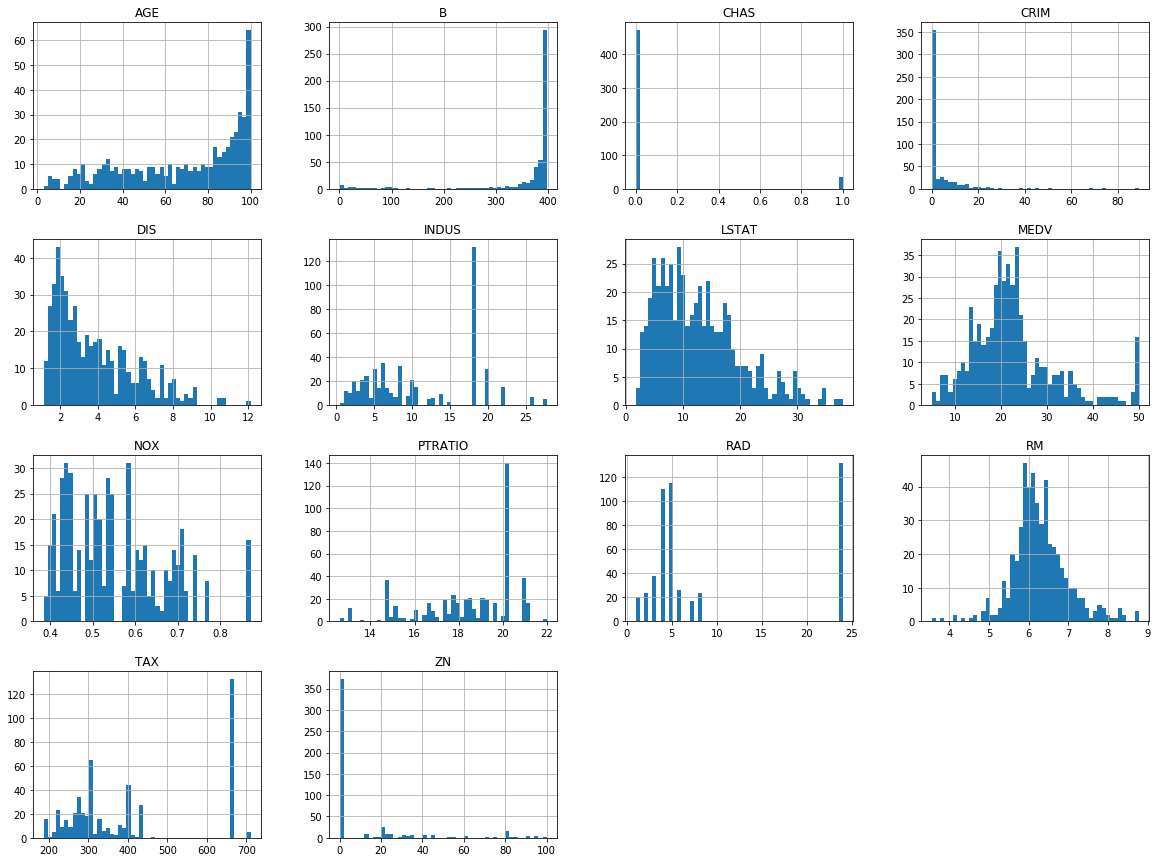

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
Dados.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Dados = Dados.drop(['LSTAT', 'PTRATIO'], axis=1)

In [18]:
X = Dados.values[:,:-1]
y = Dados.values[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1251)

In [27]:
def Calc(model):
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_std = std_scale.transform(X_train)
    X_test_std = std_scale.transform(X_test)
    model.fit(X_train_std,y_train)
    y_pred = model.predict(X_test_std)
    return np.sqrt(mt.mean_squared_error(y_test,y_pred))

In [70]:
model_SGD = lm.SGDRegressor(max_iter=5)
model_LR = lm.LinearRegression()
model_LOR = KNeighborsRegressor(n_neighbors=2)
model_LSVR = svm.LinearSVR()
model_nb = lm.BayesianRidge(compute_score=True)
model_SVR = svm.SVR()
model_DT = DecisionTreeRegressor(random_state=0)
model_RFR = ensemble.RandomForestRegressor()
model_GBR = ensemble.GradientBoostingRegressor()

In [71]:
SGD = Calc(model_SGD)
LR =Calc(model_LR)
LR =Calc(model_LR)
NB =Calc(model_nb)
LOR =Calc(model_LOR)
LSVR = Calc(model_LSVR)
DT = Calc(model_DT)
SVR = Calc(model_SVR)
RFR = Calc(model_RFR)
GBR =Calc(model_GBR)

In [17]:
menor = 2.5
for i in range(0,1251):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    SGD = Calc(model_SGD)
    LR =Calc(model_LR)
    LOR =Calc(model_LR)
    LSVR = Calc(model_LSVR)
    SVR = Calc(model_SVR)
    RFR = Calc(model_RFR)
    GBR =Calc(model_GBR)

    class_names = ['LR','LSVR','SVR','RFR','GBR']
    class_ = [LR,LSVR,SVR,RFR,GBR]
    if min(class_) < menor:
        menor =  min(class_)
        print ("-------------", i ,"---------------")
        for i in range(0,len(class_names)):
            print(class_names[i] + ': ' + str(class_[i]))

------------- 3 ---------------
LR: 4.116196425564966
LSVR: 4.456643240308106
SVR: 4.819127338961689
RFR: 2.8381155719949107
GBR: 2.4117809471918124
------------- 26 ---------------
LR: 4.642869284426388
LSVR: 5.158877314677567
SVR: 5.541223858284199
RFR: 3.0729155217678166
GBR: 2.281129436230584
------------- 66 ---------------
LR: 3.9732108082437385
LSVR: 4.230325006415565
SVR: 5.052040376798885
RFR: 3.1098535682064314
GBR: 2.1190647475117914
------------- 557 ---------------
LR: 4.245581054672737
LSVR: 4.1199677267549575
SVR: 5.410635983707597
RFR: 2.5040940986516387
GBR: 2.0818041283135904
------------- 565 ---------------
LR: 3.7813772012071656
LSVR: 4.00364039160762
SVR: 4.608370510560335
RFR: 2.576440773397194
GBR: 2.0052805223958208
------------- 619 ---------------
LR: 4.855157794231607
LSVR: 4.140607699876316
SVR: 5.002218026361162
RFR: 2.640522081472733
GBR: 1.9897165086608497
------------- 1251 ---------------
LR: 3.8503784573119044
LSVR: 3.4369853433105635
SVR: 4.334032959

In [72]:
class_names = ['LR','DT','NB','kNN','LSVR','SVR','RFR','GBR']
class_ = [LR,DT,NB,LOR,LSVR,SVR,RFR,GBR]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

LR: 3.8503784573119044
DT: 4.2947185988301095
NB: 3.768227028961359
kNN: 2.8798020424886097
LSVR: 3.4382465093064174
SVR: 4.334032959197115
RFR: 2.7744757498083326
GBR: 1.9378050453903697


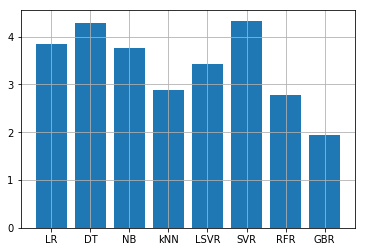

In [73]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names);

In [52]:
model = ensemble.GradientBoostingRegressor()

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)

model.fit(X_train_std,y_train)

dados = [[11.1604,   0., 18.1,  0.,  0.74, 6.629, 94.6, 2.1247, 24., 666.,20.2, 109.85, 23.27]]

model.predict(dados)[0]

14.54122558649091

In [46]:
X_test[0], y_test[0]

(array([ 11.1604,   0.    ,  18.1   ,   0.    ,   0.74  ,   6.629 ,
         94.6   ,   2.1247,  24.    , 666.    ,  20.2   , 109.85  ,
         23.27  ]), 13.4)

In [53]:
a = "ds"

In [56]:
type(bytes(a, 'utf-8'))

bytes